In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML, display
import tabulate

In [2]:
dataset = pd.read_csv("../../data/developerdecision_file.csv")
print(f"The complete dataset has {len(dataset)} Java files with conflicts.")

The complete dataset has 78937 Java files with conflicts.


In [3]:
dataset.head()

,file_id,file_name,file_path,sha,project,chunks,version1,version2,concatenation,combination,manual,none,version1_perc,version2_perc,concatenation_perc,combination_perc,manual_perc,none_perc
0,625622,InternalFeatureParser.java,/home/gleiph/Desktop/analysis/rep100/Jnario/or...,7a9c34eda1a1853068fb933248418e9a6ffbab64,sebastianbenz/Jnario,3942,3942,0,0,0,0,0,1.000000,0.0,0.0,0.000000,0.000000,0.000000
1,625632,InternalSpecParser.java,/home/gleiph/Desktop/analysis/rep100/Jnario/or...,7a9c34eda1a1853068fb933248418e9a6ffbab64,sebastianbenz/Jnario,3430,3429,0,0,0,1,0,0.999708,0.0,0.0,0.000000,0.000292,0.000000
2,625627,InternalFeatureParser.java,/home/gleiph/Desktop/analysis/rep100/Jnario/or...,7a9c34eda1a1853068fb933248418e9a6ffbab64,sebastianbenz/Jnario,1481,1478,0,0,1,2,0,0.997974,0.0,0.0,0.000675,0.001350,0.000000
3,625634,InternalSpecParser.java,/home/gleiph/Desktop/analysis/rep100/Jnario/or...,7a9c34eda1a1853068fb933248418e9a6ffbab64,sebastianbenz/Jnario,1336,1333,0,0,0,2,1,0.997754,0.0,0.0,0.000000,0.001497,0.000749
4,512226,ThingmlParser.java,/home/gleiph/Desktop/analysis/rep46/ThingML/or...,310dbe9834091cb017c61704e1e3d6b5462d2066,SINTEF-9012/ThingML,924,895,0,0,1,28,0,0.968615,0.0,0.0,0.001082,0.030303,0.000000


# In how many files the same strategy was adopted for all chunks?

In [4]:
version1 = dataset[(dataset['version1_perc'] == 1)]
# print(f"Version1: {len(version1)} files which is {(len(version1)/len(dataset)*100):.2f}% of the dataset")

version2 = dataset[(dataset['version2_perc'] == 1)]
# print(f"Version2: {len(version2)} files which is {(len(version2)/len(dataset)*100):.2f}% of the dataset")

concatenation = dataset[(dataset['concatenation_perc'] == 1)]
# print(f"Concatenation: {len(concatenation)} files which is {(len(concatenation)/len(dataset)*100):.2f}% of the dataset")

manual = dataset[(dataset['manual_perc'] == 1)]
# print(f"Manual: {len(manual)} files which is {(len(manual)/len(dataset)*100):.2f}% of the dataset")

none = dataset[(dataset['none_perc'] == 1)]
# print(f"None: {len(none)} files which is {(len(none)/len(dataset)*100):.2f}% of the dataset")

combination = dataset[(dataset['combination_perc'] == 1)]
# print(f"Combination: {len(combination)} files which is {(len(combination)/len(dataset)*100):.2f}% of the dataset")

total_same = len(version1) + len(version2) + len(concatenation) + len(manual) + len(none) + len(combination)
# print(f"Considering all strategies: {total_same} files which is {(total_same/len(dataset)*100):.2f}% of the dataset")
print("Number of files where the same strategy is adopted for all chunks.")
table = [
         ["Version1",len(version1), f"{(len(version1)/len(dataset)*100):.2f}%"],
         ["Version2",len(version2), f"{(len(version2)/len(dataset)*100):.2f}%"],
         ["Concatenation",len(concatenation), f"{(len(concatenation)/len(dataset)*100):.2f}%"],
         ["Combination",len(combination), f"{(len(combination)/len(dataset)*100):.2f}%"],
         ["Manual",len(manual), f"{(len(manual)/len(dataset)*100):.2f}%"],
         ["None",len(none), f"{(len(none)/len(dataset)*100):.2f}%"],
         ["All strategies",total_same, f"{(total_same/len(dataset)*100):.2f}%"]]
display(HTML(tabulate.tabulate(table, headers=["Resolution strategy", "Number of files", "Percentage of the dataset"], tablefmt='html')))

Number of files where the same strategy is adopted for all chunks.


Resolution strategy,Number of files,Percentage of the dataset
Version1,32025,40.57%
Version2,16497,20.90%
Concatenation,3112,3.94%
Combination,7734,9.80%
Manual,7832,9.92%
None,257,0.33%
All strategies,67457,85.46%


# In how many files the same strategy was adopted for all chunks when the file had more than one chunk?

In [5]:
dataset_more_than_one_chunk = dataset[dataset['chunks'] > 1]
print(f"Total files with more than one chunk (restricted dataset): {len(dataset_more_than_one_chunk)}, which is {(len(dataset_more_than_one_chunk)/len(dataset)*100):.2f}% of the whole dataset")

version1_restricted = dataset_more_than_one_chunk[(dataset_more_than_one_chunk['version1_perc'] == 1)]
# print(f"Version1: {len(version1_restricted)} merges which is {(len(version1_restricted)/len(dataset_more_than_one_chunk)*100):.2f}% of the restricted dataset")

version2_restricted = dataset_more_than_one_chunk[(dataset_more_than_one_chunk['version2_perc'] == 1)]
# print(f"Version2: {len(version2_restricted)} merges which is {(len(version2_restricted)/len(dataset_more_than_one_chunk)*100):.2f}% of the restricted dataset")

concatenation_restricted = dataset_more_than_one_chunk[(dataset_more_than_one_chunk['concatenation_perc'] == 1)]
# print(f"Concatenation: {len(concatenation_restricted)} merges which is {(len(concatenation_restricted)/len(dataset_more_than_one_chunk)*100):.2f}% of the restricted dataset")

manual_restricted = dataset_more_than_one_chunk[(dataset_more_than_one_chunk['manual_perc'] == 1)]
# print(f"Manual: {len(manual_restricted)} merges which is {(len(manual_restricted)/len(dataset_more_than_one_chunk)*100):.2f}% of the restricted dataset")

none_restricted = dataset_more_than_one_chunk[(dataset_more_than_one_chunk['none_perc'] == 1)]
# print(f"None: {len(none_restricted)} merges which is {(len(none_restricted)/len(dataset_more_than_one_chunk)*100):.2f}% of the restricted dataset")

combination_restricted = dataset_more_than_one_chunk[(dataset_more_than_one_chunk['combination_perc'] == 1)]
# print(f"Combination: {len(combination_restricted)} merges which is {(len(combination_restricted)/len(dataset_more_than_one_chunk)*100):.2f}% of the restricted dataset")

total_same_restricted = len(version1_restricted) + len(version2_restricted) + len(concatenation_restricted) + len(manual_restricted) + len(none_restricted) + len(combination_restricted)
# print(f"Considering all strategies: {total_same_restricted} merges which is {(total_same_restricted/len(dataset_more_than_one_chunk)*100):.2f}% of the restricted dataset")
print("Number of files where the same strategy is adopted for all chunks for files with more than 1 chunk.")
table = [
         ["Version1",len(version1_restricted), f"{(len(version1_restricted)/len(dataset_more_than_one_chunk)*100):.2f}%"],
         ["Version2",len(version2_restricted), f"{(len(version2_restricted)/len(dataset_more_than_one_chunk)*100):.2f}%"],
         ["Concatenation",len(concatenation_restricted), f"{(len(concatenation_restricted)/len(dataset_more_than_one_chunk)*100):.2f}%"],
         ["Combination",len(combination_restricted), f"{(len(combination_restricted)/len(dataset_more_than_one_chunk)*100):.2f}%"],
         ["Manual",len(manual_restricted), f"{(len(manual_restricted)/len(dataset_more_than_one_chunk)*100):.2f}%"],
         ["None",len(none_restricted), f"{(len(none_restricted)/len(dataset_more_than_one_chunk)*100):.2f}%"],
         ["All strategies",total_same_restricted, f"{(total_same_restricted/len(dataset_more_than_one_chunk)*100):.2f}%"]]
display(HTML(tabulate.tabulate(table, headers=["Resolution strategy", "Number of files", "Percentage of the dataset"], tablefmt='html')))

Total files with more than one chunk (restricted dataset): 29613, which is 37.51% of the whole dataset
Number of files where the same strategy is adopted for all chunks for files with more than 1 chunk.


Resolution strategy,Number of files,Percentage of the dataset
Version1,10141,34.25%
Version2,4892,16.52%
Concatenation,316,1.07%
Combination,833,2.81%
Manual,1945,6.57%
None,6,0.02%
All strategies,18133,61.23%


# Percentage of homogenous vs. heterogenous resolution strategies for files with different numbers of conflicting chunks

In [6]:
def is_homogeneous(row):
    return row['chunks'] == row['version1'] or row['chunks'] == row['version2'] or row['chunks'] == row['concatenation'] or row['chunks'] == row['combination'] or row['chunks'] == row['manual'] or row['chunks'] == row['none']

def get_count(df):
    homogeneous_count = 0
    heterogeneous_count = 0
    for index, row in df.iterrows():
        if is_homogeneous(row):
            homogeneous_count+=1
        else:
            heterogeneous_count+=1
    return homogeneous_count, heterogeneous_count
        

In [7]:
graph_data = []
for chunks_amount in range(1,18):
    homogeneous_count, heterogeneous_count = get_count(dataset[dataset['chunks'] == chunks_amount])
    homo_perc = homogeneous_count/(homogeneous_count + heterogeneous_count)
    hete_perc = heterogeneous_count/(homogeneous_count + heterogeneous_count)
    graph_data.append([chunks_amount,homo_perc,hete_perc])

homogeneous_count, heterogeneous_count = get_count(dataset[dataset['chunks'] >= 18])
homo_perc = homogeneous_count/(homogeneous_count + heterogeneous_count)
hete_perc = heterogeneous_count/(homogeneous_count + heterogeneous_count)
graph_data.append(('18+',homo_perc,hete_perc))

graph_data = pd.DataFrame(graph_data, columns=["Chunks", "Homogeneous", "Heterogeneous"], index=None)
graph_data


,Chunks,Homogeneous,Heterogeneous
0,1,1.000000,0.000000
1,2,0.673102,0.326898
2,3,0.583096,0.416904
3,4,0.538884,0.461116
4,5,0.541535,0.458465
5,6,0.520562,0.479438
6,7,0.531126,0.468874
7,8,0.575824,0.424176
8,9,0.523416,0.476584
9,10,0.554817,0.445183


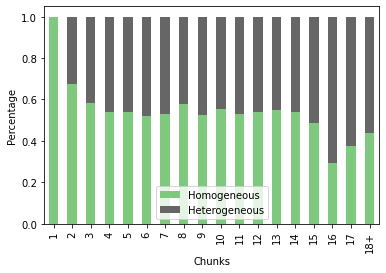

In [8]:
axes = graph_data.plot.bar(x='Chunks', ylabel="Percentage", stacked=True, colormap='Accent')

In [11]:
graph_data = []
for chunks_amount in range(1,18):
    total_files = len(dataset[dataset['chunks'] == chunks_amount])
    graph_data.append([chunks_amount,total_files])

total_files = len(dataset[dataset['chunks'] >= 18])
graph_data.append(['18+',total_files])

graph_data = pd.DataFrame(graph_data, columns=["Chunks", "Total files"], index=None)
graph_data

,Chunks,Total files
0,1,49324
1,2,14815
2,3,5963
3,4,3099
4,5,1577
5,6,997
6,7,755
7,8,455
8,9,363
9,10,301


Number of files per chunk number


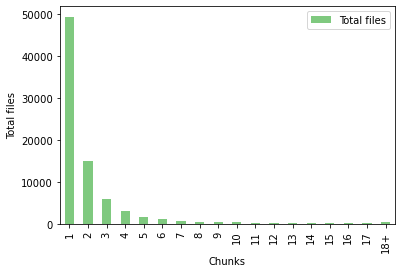

In [22]:
print("Number of files per chunk number")
axes = graph_data.plot.bar(x='Chunks', ylabel="Total files", stacked=False, colormap='Accent')

# Percentage of types of resolution strategies for files with different numbers of conflicting chunks

In [ ]:
filtered_dataset = dataset[["chunks", "version1","version2","concatenation","combination","manual","none"]]
filtered_dataset.head()

In [ ]:
def get_resolution_strategies_count(df):
    count = {'version1': 0, 'version2':0, 'concatenation':0, 'combination': 0, 'manual': 0, 'none': 0}
    for index, row in df.iterrows():
        count['version1']+=row['version1']
        count['version2']+=row['version2']
        count['concatenation']+=row['concatenation']
        count['combination']+=row['combination']
        count['manual']+=row['manual']
        count['none']+=row['none']
    return count
        
def get_total_count(count):
    total = 0
    for item in count:
        total+=count[item]
    return total
        
    
graph_data = []
for chunks_amount in range(1,18):
    count = get_resolution_strategies_count(filtered_dataset[filtered_dataset['chunks'] == chunks_amount])
    total = get_total_count(count)
    version1 = count['version1']/total
    version2 = count['version2']/total
    concatenation = count['concatenation']/total
    combination = count['combination']/total
    manual = count['manual']/total
    none = count['none']/total
    graph_data.append([chunks_amount,version1,version2,concatenation,combination,manual,none])

count = get_resolution_strategies_count(filtered_dataset[filtered_dataset['chunks'] >=18])
total = get_total_count(count)
version1 = count['version1']/total
version2 = count['version2']/total
concatenation = count['concatenation']/total
combination = count['combination']/total
manual = count['manual']/total
none = count['none']/total
graph_data.append(['18+',version1,version2,concatenation,combination,manual,none])

graph_data = pd.DataFrame(graph_data, columns=["chunks", 'version1', 'version2', 'concatenation', 'combination', 'manual', 'none'], index=None)
graph_data


In [ ]:
axes = graph_data.plot.bar(x='chunks', ylabel="Percentage", stacked=True, colormap='Accent')